# SC1015 : Introduction to Data Science and Artificial Intelligence
# Mini-Project : Spread of Covid in US Counties

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
usa_covid = pd.read_csv('county_megaset.csv')
usa_covid.head()

,COUNTYNS,Geographic Identifier - FIPS Code,Area of Land (square meters),Area of Water (square meters),Name,State,Average Household Size,Average Household Size - Margin of Error,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit - Margin of Error,...,code3,County_Name_y,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,161526,1001,1.539602e+09,25706961,Autauga County,Alabama,2.59,0.05,2.59,0.07,...,840,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",7/27/20,932,20
1,161527,1003,4.117547e+09,1133055836,Baldwin County,Alabama,2.61,0.04,2.66,0.06,...,840,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",7/27/20,2727,17
2,161528,1005,2.292145e+09,50538698,Barbour County,Alabama,2.49,0.07,2.44,0.11,...,840,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",7/27/20,529,4
3,161529,1007,1.612167e+09,9602089,Bibb County,Alabama,2.99,0.14,3.05,0.18,...,840,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",7/27/20,327,2
4,161530,1009,1.670104e+09,15015423,Blount County,Alabama,2.77,0.05,2.85,0.07,...,840,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",7/27/20,601,1


In [4]:
usa_covid.describe()

,COUNTYNS,Geographic Identifier - FIPS Code,Area of Land (square meters),Area of Water (square meters),Average Household Size,Average Household Size - Margin of Error,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit - Margin of Error,Average Household Size of Renter-Occupied Unit,Average Household Size of Renter-Occupied Unit - Margin of Error,...,Total NonFamily Hhlds w/Male Householder *margin of error,Total NonFamily Hhlds w/Female Householder *margin of error,Shape__Area,Shape__Length,UID,code3,Lat,Long_,Confirmed,Deaths
count,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3219.000000,3219.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.00000
mean,9.628897e+05,31393.605280,2.844093e+09,2.143251e+08,2.529093,0.081494,2.563088,0.102336,2.444950,0.202314,...,341.631988,345.832609,2.581581,0.342835,8.352270e+07,834.913043,37.965788,-91.661759,1316.137578,45.27764
std,5.174236e+05,16292.078954,9.255389e+09,1.220804e+09,0.279374,0.067781,0.274885,0.079810,0.393263,0.182878,...,354.654053,372.099228,3.558888,1.790048,3.222722e+06,32.290983,6.095200,13.388721,6962.304363,456.31641
min,2.390100e+04,1001.000000,5.300265e+06,0.000000e+00,1.340000,0.010000,1.790000,0.010000,1.360000,0.010000,...,7.000000,12.000000,0.126110,0.000550,6.307200e+07,630.000000,17.982429,-174.159600,0.000000,0.00000
25%,4.849888e+05,19032.500000,1.085268e+09,7.009854e+06,2.350000,0.040000,2.400000,0.050000,2.200000,0.100000,...,140.000000,135.000000,1.622240,0.114586,8.401806e+07,840.000000,34.353621,-98.086287,43.000000,0.00000
50%,9.741585e+05,30024.000000,1.565689e+09,1.938601e+07,2.490000,0.070000,2.520000,0.090000,2.400000,0.170000,...,237.000000,235.000000,1.975052,0.164877,8.402910e+07,840.000000,38.212711,-89.945118,158.000000,2.00000
75%,1.419973e+06,46105.500000,2.368884e+09,6.069241e+07,2.650000,0.100000,2.690000,0.130000,2.640000,0.250000,...,406.000000,405.250000,2.594089,0.246600,8.404504e+07,840.000000,41.694461,-82.990516,585.000000,13.00000
max,2.516404e+06,72153.000000,3.770000e+11,2.599228e+10,4.970000,1.140000,4.880000,1.460000,6.810000,5.490000,...,4343.000000,4295.000000,71.549539,74.257061,8.405604e+07,840.000000,69.314792,-65.288130,224051.000000,23500.00000


Previously, we got a sneak peek at some of the county data sets, highlighting information such as, Average Household Size and Population Density, Health Insurance Coverage, Income and Benefits, Occupation by Sex, Population and Poverty Status and USA County Covid Tracking. Now that we have merged all the data into one file, we can compare each of these data points and try to figure out how each of these demographic factors influence the Covid infections and deaths in each US County.

<AxesSubplot:>

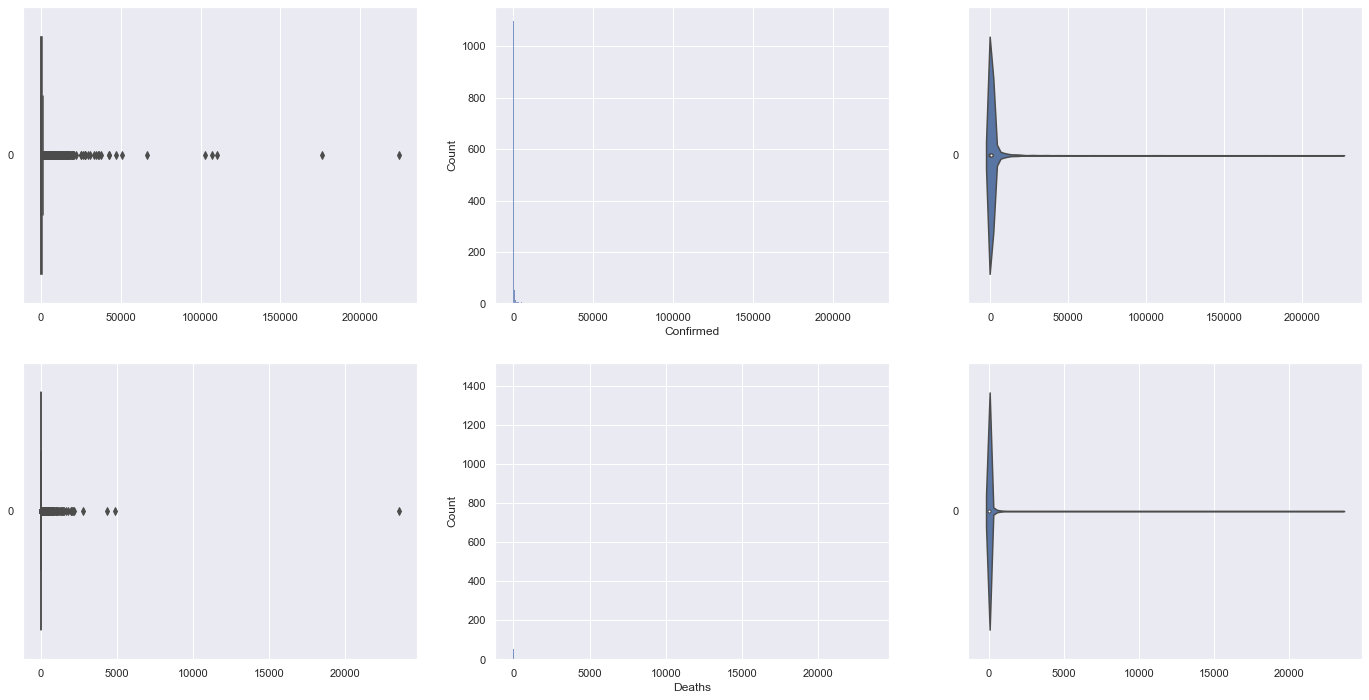

In [5]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = usa_covid['Confirmed'], orient = "h", ax = axes[0,0])
sb.histplot(data = usa_covid['Confirmed'], ax = axes[0,1])
sb.violinplot(data = usa_covid['Confirmed'], orient = "h", ax = axes[0,2])

sb.boxplot(data = usa_covid['Deaths'], orient = "h", ax = axes[1,0])
sb.histplot(data = usa_covid['Deaths'], ax = axes[1,1])
sb.violinplot(data = usa_covid['Deaths'], orient = "h", ax = axes[1,2])

In [6]:
#Removing Outliers
Q1c = usa_covid['Confirmed'].quantile(0.25)
Q3c = usa_covid['Confirmed'].quantile(0.75)
IQRc = Q3c - Q1c
usa_covid_wooutliers = pd.DataFrame(usa_covid[((usa_covid['Confirmed'] > (Q1c - 1.5 * IQRc)) & (usa_covid['Confirmed'] < (Q3c + 1.5 * IQRc)))])

In [7]:
#Removing Outliers
Q1d = usa_covid['Deaths'].quantile(0.25)
Q3d = usa_covid['Deaths'].quantile(0.75)
IQRd = Q3d - Q1d
usa_covid_wooutliers = pd.DataFrame(usa_covid_wooutliers[((usa_covid_wooutliers['Deaths'] > (Q1d - 1.5 * IQRd)) & (usa_covid_wooutliers['Deaths'] < (Q3d + 1.5 * IQRd)))])

In [11]:
#Removing Outliers
Q1d = usa_covid['Population Density (people per square kilometer)'].quantile(0.25)
Q3d = usa_covid['Population Density (people per square kilometer)'].quantile(0.75)
IQRd = Q3d - Q1d
usa_covid_wooutliers = pd.DataFrame(usa_covid_wooutliers[((usa_covid_wooutliers['Population Density (people per square kilometer)'] > (Q1d - 1.5 * IQRd)) & (usa_covid_wooutliers['Population Density (people per square kilometer)'] < (Q3d + 1.5 * IQRd)))])

<AxesSubplot:>

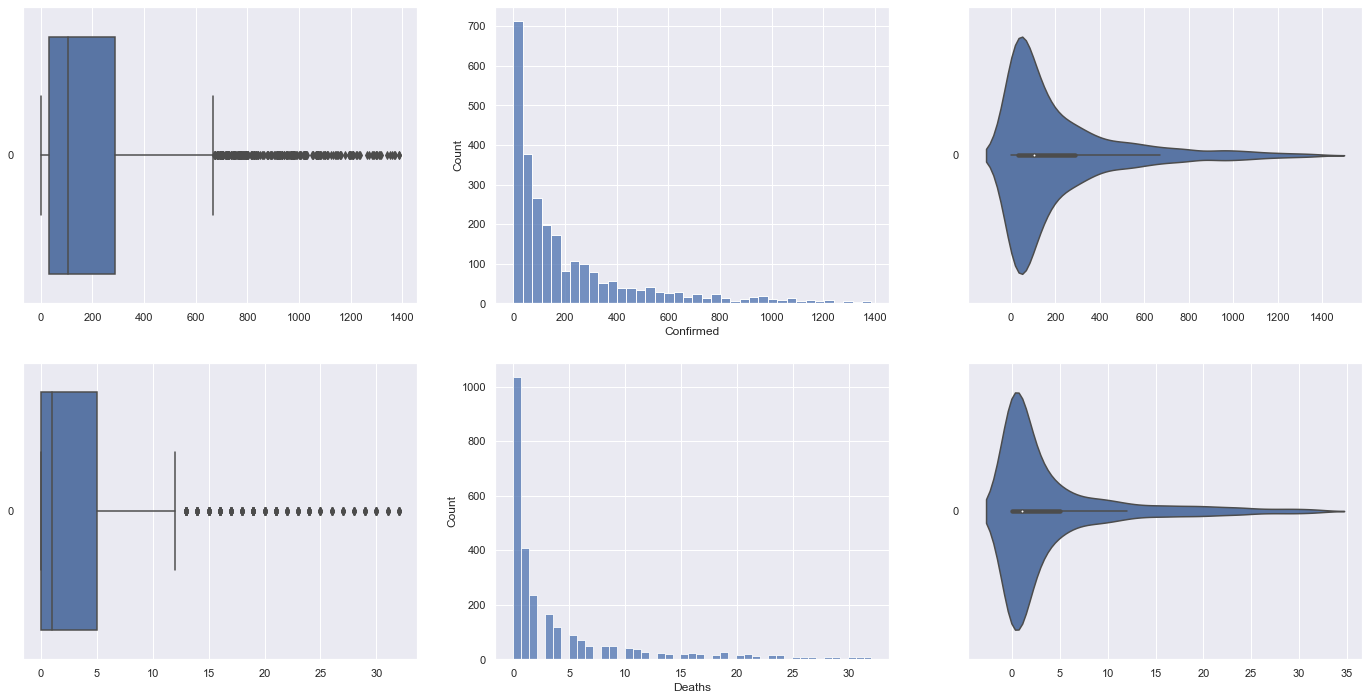

In [8]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = usa_covid_wooutliers['Confirmed'], orient = "h", ax = axes[0,0])
sb.histplot(data = usa_covid_wooutliers['Confirmed'], ax = axes[0,1])
sb.violinplot(data = usa_covid_wooutliers['Confirmed'], orient = "h", ax = axes[0,2])

sb.boxplot(data = usa_covid_wooutliers['Deaths'], orient = "h", ax = axes[1,0])
sb.histplot(data = usa_covid_wooutliers['Deaths'], ax = axes[1,1])
sb.violinplot(data = usa_covid_wooutliers['Deaths'], orient = "h", ax = axes[1,2])

NOTE: Exponential decay maybe

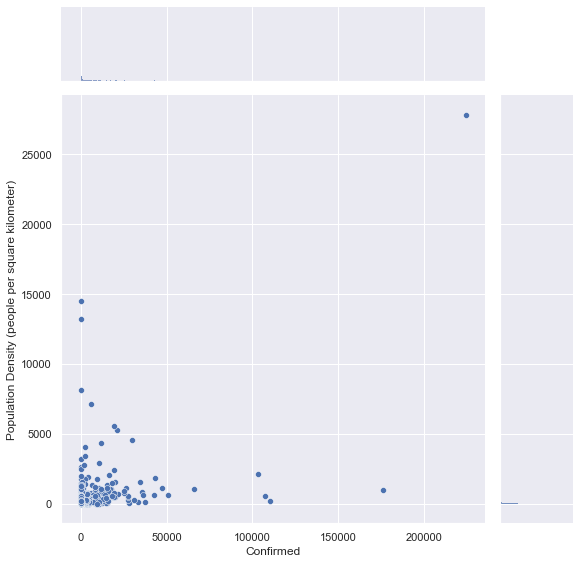

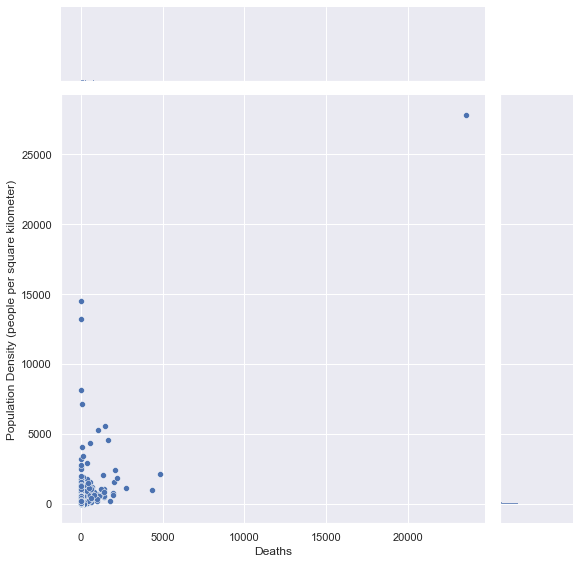

In [9]:
sb.jointplot(data = usa_covid, x = "Confirmed", y = "Population Density (people per square kilometer)", height = 8)
sb.jointplot(data = usa_covid, x = "Deaths", y = "Population Density (people per square kilometer)", height = 8)

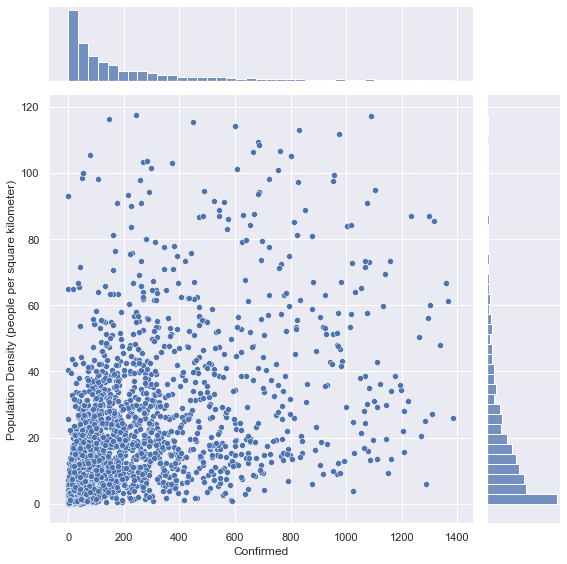

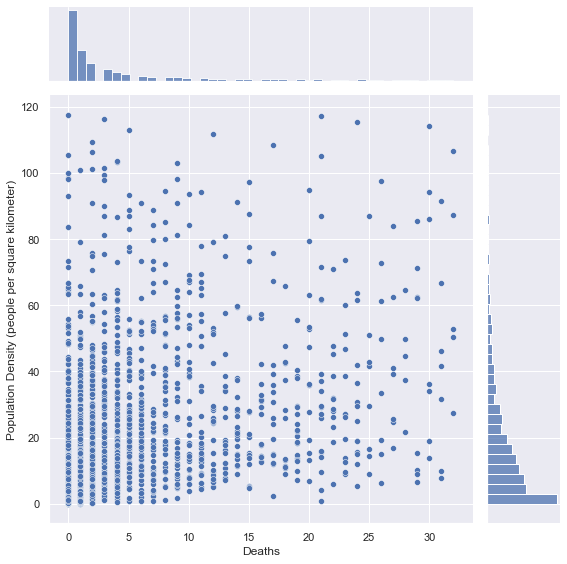

In [12]:
sb.jointplot(data = usa_covid_wooutliers, x = "Confirmed", y = "Population Density (people per square kilometer)", height = 8)
sb.jointplot(data = usa_covid_wooutliers, x = "Deaths", y = "Population Density (people per square kilometer)", height = 8)

In [15]:
usa_covid1 = usa_covid[['Deaths', 'Confirmed', 'Population Density (people per square kilometer)']]
usa_covid1.corr()

,Deaths,Confirmed,Population Density (people per square kilometer)
Deaths,1.000000,0.794622,0.724268
Confirmed,0.794622,1.000000,0.527933
Population Density (people per square kilometer),0.724268,0.527933,1.000000


In [17]:
usa_covid_wooutliers1 = usa_covid_wooutliers[['Deaths', 'Confirmed', 'Population Density (people per square kilometer)']]
usa_covid_wooutliers1.corr()

,Deaths,Confirmed,Population Density (people per square kilometer)
Deaths,1.000000,0.655726,0.398967
Confirmed,0.655726,1.000000,0.512669
Population Density (people per square kilometer),0.398967,0.512669,1.000000
